In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import DenseNet121


In [11]:
import os
disease_types = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Blueberry___healthy','Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Tomato___Bacterial_spot','Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot','Peach___healthy','Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Tomato___Early_blight','Potato___healthy','Potato___Late_blight','Raspberry___healthy','Soybean___healthy','Squash___Powdery_mildew','Strawberry___Leaf_scorch','Strawberry___healthy','Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
data_dir = r'C:\Users\User\OneDrive\Desktop\python_exe\major project\New Plant Diseases Dataset(Augmented)\train'
train_dir = os.path.join(data_dir)
#test_dir = os.path.join(data_dir, 'test')train_dir = r'C:\Users\ANITHRA ROSS AJITH\Documents\code\tomato leaf disease\training\New Plant Diseases Dataset(Augmented)\train'


In [12]:
print("Folders in train_dir:", os.listdir(train_dir))


Folders in train_dir: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two

In [22]:

num_items = len(os.listdir(train_dir))

print(f"Number of items in '{train_dir}':", num_items)


Number of items in 'C:\Users\User\OneDrive\Desktop\python_exe\major project\New Plant Diseases Dataset(Augmented)\train': 38


In [13]:
import os
train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])

train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.tail()

,File,DiseaseID,Disease Type
73912,Tomato___Tomato_Yellow_Leaf_Curl_Virus/ffb295c...,39,Tomato___Tomato_Yellow_Leaf_Curl_Virus
73913,Tomato___Tomato_Yellow_Leaf_Curl_Virus/ffe08cc...,39,Tomato___Tomato_Yellow_Leaf_Curl_Virus
73914,Tomato___Tomato_Yellow_Leaf_Curl_Virus/ffe996e...,39,Tomato___Tomato_Yellow_Leaf_Curl_Virus
73915,Tomato___Tomato_Yellow_Leaf_Curl_Virus/fff42f1...,39,Tomato___Tomato_Yellow_Leaf_Curl_Virus
73916,Tomato___Tomato_Yellow_Leaf_Curl_Virus/fff6bf8...,39,Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [14]:
for defects_id, sp in enumerate(disease_types):
    full_path = os.path.join(train_dir, sp)
    print(f"Checking path: {full_path}")
    for file in os.listdir(full_path):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])


Checking path: C:\Users\User\OneDrive\Desktop\python_exe\major project\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab
Checking path: C:\Users\User\OneDrive\Desktop\python_exe\major project\New Plant Diseases Dataset(Augmented)\train\Apple___Black_rot
Checking path: C:\Users\User\OneDrive\Desktop\python_exe\major project\New Plant Diseases Dataset(Augmented)\train\Apple___Cedar_apple_rust
Checking path: C:\Users\User\OneDrive\Desktop\python_exe\major project\New Plant Diseases Dataset(Augmented)\train\Apple___healthy
Checking path: C:\Users\User\OneDrive\Desktop\python_exe\major project\New Plant Diseases Dataset(Augmented)\train\Blueberry___healthy
Checking path: C:\Users\User\OneDrive\Desktop\python_exe\major project\New Plant Diseases Dataset(Augmented)\train\Cherry_(including_sour)___healthy
Checking path: C:\Users\User\OneDrive\Desktop\python_exe\major project\New Plant Diseases Dataset(Augmented)\train\Cherry_(including_sour)___Powdery_mildew
Checking path: C:\User

In [15]:
SEED = 42
train = train.sample(frac=1, random_state=SEED)
train.index = np.arange(len(train)) # Reset indices
train.head()

,File,DiseaseID,Disease Type
0,Strawberry___healthy/fb1750de-1250-4bf5-806b-f...,29,Strawberry___healthy
1,Orange___Haunglongbing_(Citrus_greening)/d9359...,16,Orange___Haunglongbing_(Citrus_greening)
2,Tomato___Early_blight/1873e09f-31fd-4612-920a-...,22,Tomato___Early_blight
3,Apple___healthy/14bb032e-5462-40e4-9056-0e9c3e...,3,Apple___healthy
4,"Pepper,_bell___Bacterial_spot/a3f4ee94-8c9f-4c...",19,"Pepper,_bell___Bacterial_spot"


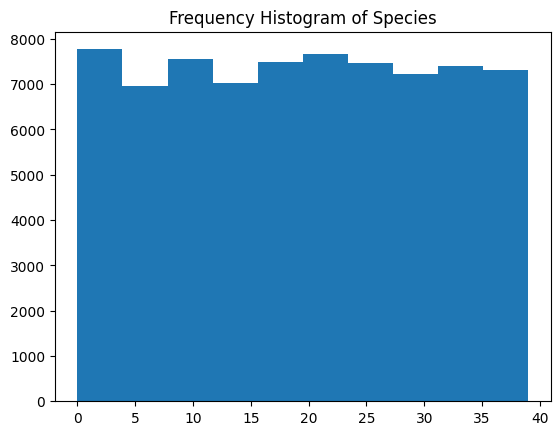

<Figure size 1200x1200 with 0 Axes>

In [16]:
# Plot a histogram
plt.hist(train['DiseaseID'])
plt.title('Frequency Histogram of Species')
plt.figure(figsize=(12, 12))
plt.show()

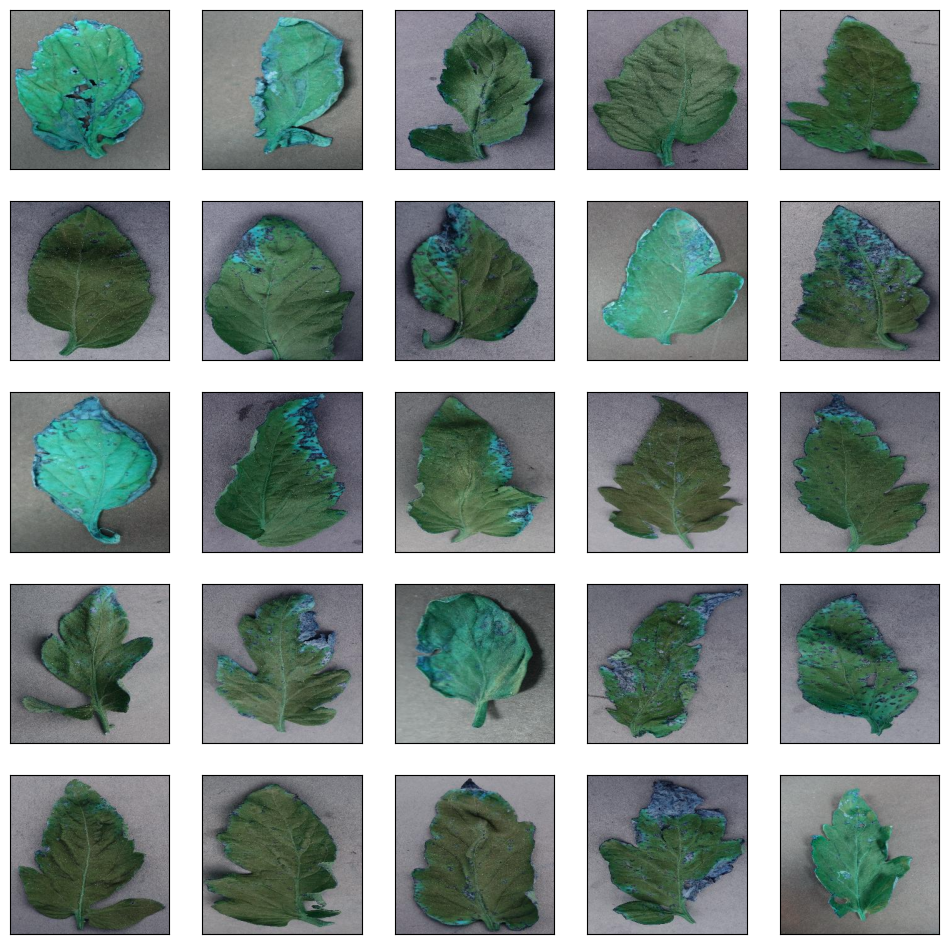

In [17]:
# Display images for different species
def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = train['File'][train['Disease Type'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_defects('Tomato___Bacterial_spot', 5, 5)

In [18]:
IMAGE_SIZE = 64

def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) # Loading a color image is the default flag
# Resize image to target size
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [19]:
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
# Normalize the data
X_Train = X_train / 255.
print('Train Shape: {}'.format(X_Train.shape))

73917it [19:44, 62.41it/s] 


Train Shape: (73917, 64, 64, 3)


In [26]:
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=40)

In [28]:
BATCH_SIZE = 64

# Split the train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.2, random_state=SEED)

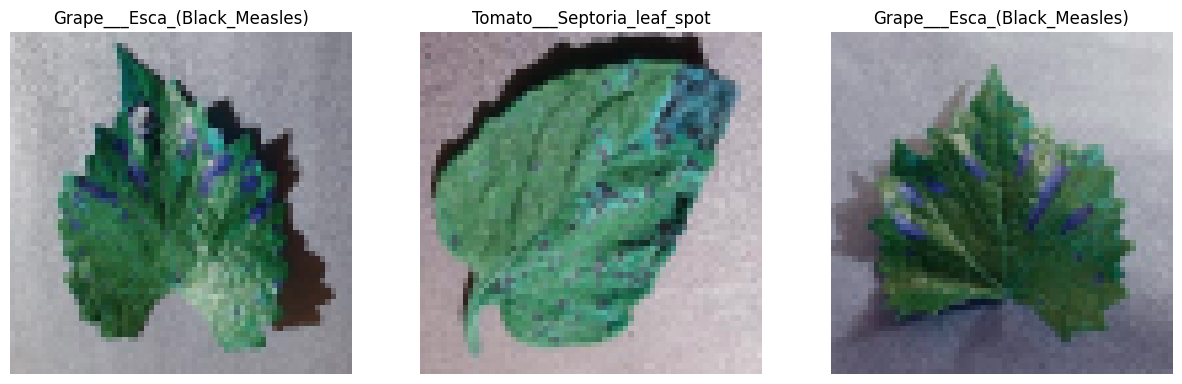

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(disease_types[np.argmax(Y_train[i])])

In [30]:
EPOCHS = 50
SIZE=64
N_ch=3

In [31]:
def build_densenet():
    densenet = DenseNet121(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)

    x = densenet(x)

    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(40,activation = 'softmax', name='root')(x)


    # model
    model = Model(input,output)

    optimizer = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


    model.summary()

    return model

In [32]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
model = build_densenet()

annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.keras', verbose=1, save_best_only=True)

# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)
# Fits the model on batches with real-time data augmentation
hist = model.fit(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                 steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
                 epochs=EPOCHS,
                 verbose=2,
                 callbacks=[annealer, checkpoint],
                 validation_data=(X_val, Y_val))


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step 


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 3)           │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 2, 2, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ root (Dense)                         │ (None, 40)                  │          10,280 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,315,388 (27.91 MB)

 Trainable params: 7,229,180 (27.58 MB)

 Non-trainable params: 86,208 (336.75 KB)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50

Epoch 1: val_loss improved from inf to 0.51304, saving model to model.keras
923/923 - 1938s - 2s/step - accuracy: 0.4525 - loss: 2.1820 - val_accuracy: 0.8256 - val_loss: 0.5130 - learning_rate: 0.0020
Epoch 2/50


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 0.51304 to 0.50586, saving model to model.keras
923/923 - 102s - 111ms/step - accuracy: 0.8281 - loss: 0.6210 - val_accuracy: 0.8275 - val_loss: 0.5059 - learning_rate: 0.0020
Epoch 3/50

Epoch 3: val_loss did not improve from 0.50586
923/923 - 1842s - 2s/step - accuracy: 0.8116 - loss: 0.5829 - val_accuracy: 0.7961 - val_loss: 0.6235 - learning_rate: 0.0020
Epoch 4/50

Epoch 4: val_loss did not improve from 0.50586
923/923 - 100s - 108ms/step - accuracy: 0.8125 - loss: 0.5229 - val_accuracy: 0.8147 - val_loss: 0.5525 - learning_rate: 0.0020
Epoch 5/50

Epoch 5: val_loss improved from 0.50586 to 0.25657, saving model to model.keras
923/923 - 1886s - 2s/step - accuracy: 0.8669 - loss: 0.3750 - val_accuracy: 0.8987 - val_loss: 0.2566 - learning_rate: 0.0020
Epoch 6/50

Epoch 6: val_loss did not improve from 0.25657
923/923 - 101s - 109ms/step - accuracy: 0.8125 - loss: 0.4320 - val_accuracy: 0.8860 - val_loss: 0.2993 - learning_rate: 0.0020
Epoch 7/50

Ep

In [33]:
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

462/462 ━━━━━━━━━━━━━━━━━━━━ 116s 250ms/step - accuracy: 0.8811 - loss: 0.3515
Final Loss: 0.3467459976673126, Final Accuracy: 0.8813582062721252


462/462 ━━━━━━━━━━━━━━━━━━━━ 126s 255ms/step


Text(0.5, 63.081597222222186, 'Predicted')

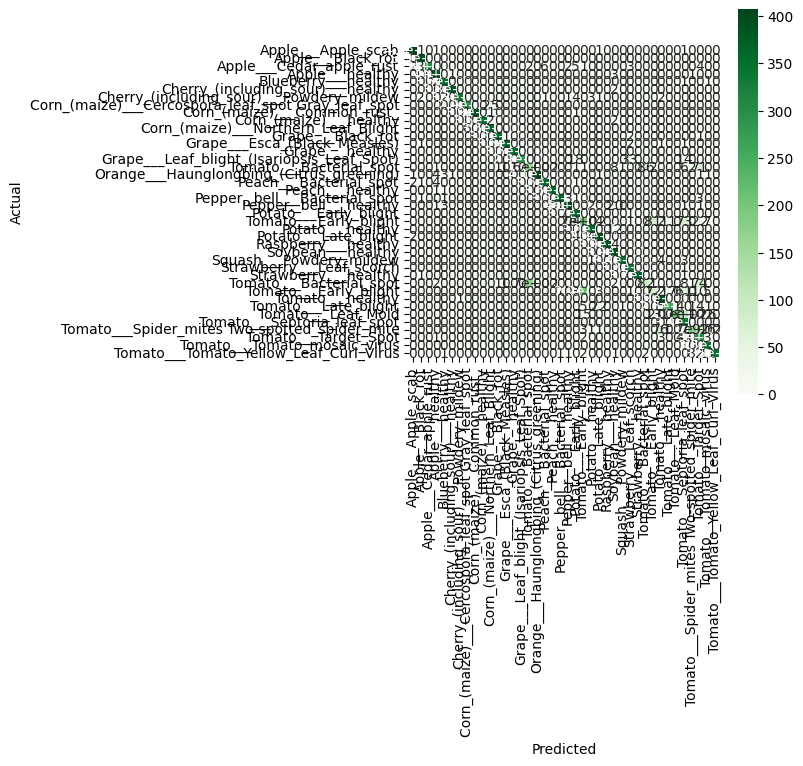

In [34]:
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=10)
ax.set_xlabel('Predicted', fontsize=10)

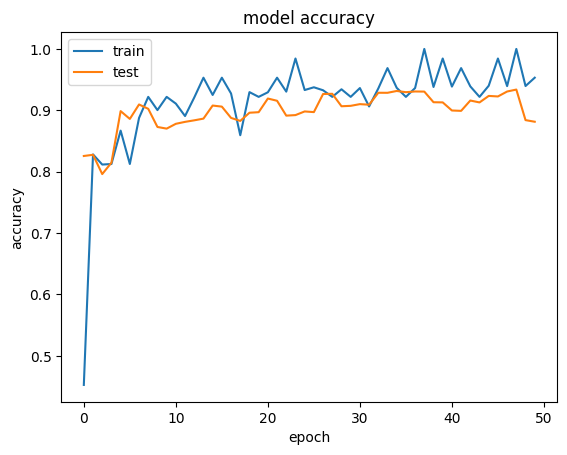

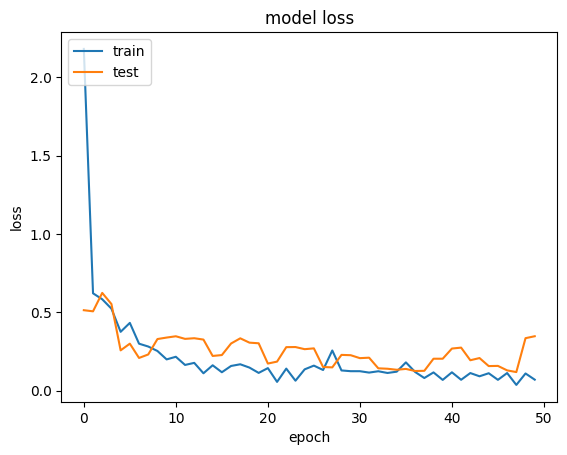

In [36]:
# accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
from skimage import io
from keras.preprocessing import image

path = r'C:\Users\ANITHRA ROSS AJITH\Documents\code\tomato leaf disease\training\test\test\TomatoEarlyBlight1.jpg'
if os.path.exists(path):
    img = image.load_img(path, color_mode='rgb', target_size=(64, 64))
    show_img = image.load_img(path, color_mode='rgb', target_size=(200, 200))
    print("Image loaded successfully.")
else:
    print("File not found at the specified path.")

disease_class = [
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
#x = np.array(x, 'float32')
x /= 255

custom = model.predict(x)
print(custom[0])



#x = x.reshape([64, 64]);

#plt.gray()
plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)

print('Prediction:',disease_class[ind])

ModuleNotFoundError: No module named 'skimage'

In [ ]:
from sklearn.metrics import f1_score, classification_report

f1 = f1_score(Y_true, Y_pred, average='weighted')
print("F1 Score (weighted):", f1)

# Detailed classification report
print("Classification Report:")
print(classification_report(Y_true, Y_pred))


In [ ]:
from sklearn.metrics import f1_score, classification_report, precision_score

# Calculating Precision
precision = precision_score(Y_true, Y_pred, average='weighted')
print("Precision (weighted):", precision)

# Calculating F1 Score
f1 = f1_score(Y_true, Y_pred, average='weighted')
print("F1 Score (weighted):", f1)

# Detailed classification report
print("Classification Report:")
print(classification_report(Y_true, Y_pred))
